### Import Library

In [1]:
import numpy as np #Operasi Matematika dan linear aljebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #Visualisasi data
%matplotlib inline
import seaborn as sns #Visualisasi data

### Load Datasets

In [2]:
data = pd.read_csv('E:/Shift/Data.csv',sep=";")

In [3]:
#Cek dimensi data
data.shape

(50, 6)

In [4]:
#Melihat 5 data pertama
data.head()

,Indeks stabilitas sistem keuangan,IHSG,IHPR,Perkembangan Kredit,Kurs,Jumlah uang beredar
0,0.96,2598.33,131.89,1158.72,9.59,1991.58
1,0.96,416.67,135.89,133.03,8.48,684.34
2,1.06,1069.48,124.97,446.02,9.10,1016.24
3,0.92,385.33,137.47,308.06,7.25,577.38
4,1.04,2645.71,132.79,1217.66,9.63,2075.04


In [5]:
#Memahami info masing-masing variabel
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Indeks stabilitas sistem keuangan  50 non-null     float64
 1   IHSG                               50 non-null     float64
 2   IHPR                               50 non-null     float64
 3   Perkembangan Kredit                50 non-null     float64
 4   Kurs                               50 non-null     float64
 5   Jumlah uang  beredar               50 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


In [6]:
#Melihat ringkasan 5 angka dari data
data.describe()

,Indeks stabilitas sistem keuangan,IHSG,IHPR,Perkembangan Kredit,Kurs,Jumlah uang beredar
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,0.965200,2607.165400,150.964600,1965.57500,10.201800,2179.935000
std,0.141078,1907.860695,21.987873,4086.69641,1.816446,1470.262341
min,0.700000,366.670000,121.000000,133.03000,7.230000,216.370000
25%,0.902500,603.585000,136.260000,308.79250,9.005000,880.702500
50%,0.980000,2622.020000,144.495000,1188.19000,9.610000,1784.050000
75%,1.060000,4367.180000,157.137500,2450.83250,11.577500,3372.795000
max,1.240000,5419.450000,194.540000,29004.09000,14.060000,4884.040000


### Data Preprocessing

#### Cek Tipe Data

In [7]:
data.dtypes

Indeks stabilitas sistem keuangan    float64
IHSG                                 float64
IHPR                                 float64
Perkembangan Kredit                  float64
Kurs                                 float64
Jumlah uang  beredar                 float64
dtype: object

#### Cek Duplikat data

In [8]:
#Drop duplicate value
data.drop_duplicates(inplace=True)
data.shape

(50, 6)

#### Cek Missing Value

In [9]:
data.isnull().sum()

Indeks stabilitas sistem keuangan    0
IHSG                                 0
IHPR                                 0
Perkembangan Kredit                  0
Kurs                                 0
Jumlah uang  beredar                 0
dtype: int64

### Cek Outlier

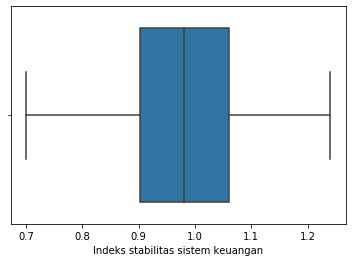

In [10]:
sns.boxplot(data["Indeks stabilitas sistem keuangan"])

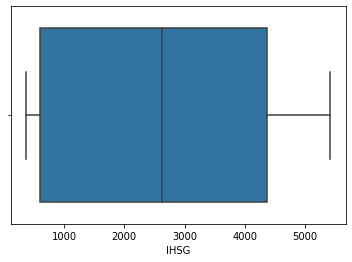

In [11]:
sns.boxplot(data["IHSG"])

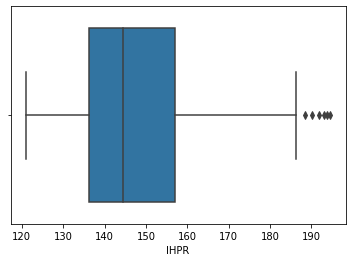

In [12]:
sns.boxplot(data["IHPR"])

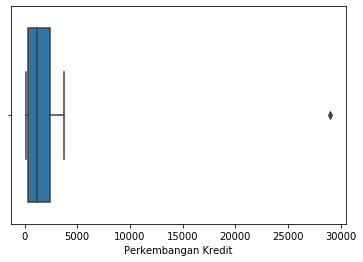

In [13]:
sns.boxplot(data["Perkembangan Kredit"])

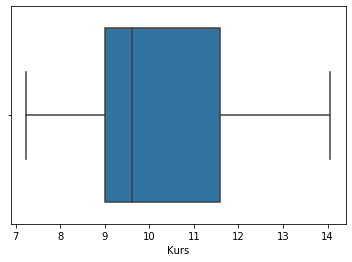

In [14]:
sns.boxplot(data["Kurs"])

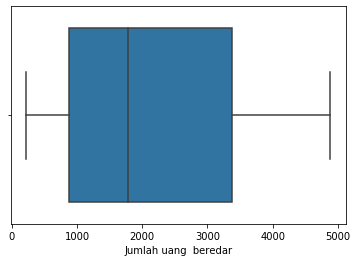

In [15]:
sns.boxplot(data["Jumlah uang  beredar"])

In [16]:
#membuat fungsi untuk mendeteksi outlier dengan lower bound dan upper bound
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("Number of Outlier {}".format(number_outlier))
    if number_outlier>0:
        print("Outlier observation row:")
    else:
        pass
    for i in range(len(sample)):
        if sample[i]<lower_range: 
            print(i)
        elif sample[i]>upper_range:
            print(i)
        else:
            pass

In [17]:
outlier(data["IHPR"])

Number of Outlier 6
Outlier observation row:
8
9
11
27
30
42


In [18]:
data.loc[(8,9,11,27,30,42),"IHPR"]

8     191.90
9     190.02
11    193.13
27    194.54
30    188.55
42    193.83
Name: IHPR, dtype: float64

In [19]:
outlier(data["Perkembangan Kredit"])

Number of Outlier 1
Outlier observation row:
39


In [20]:
data.loc[39,"Perkembangan Kredit"]

29004.09

#### Melihat Korelasi antar variabel

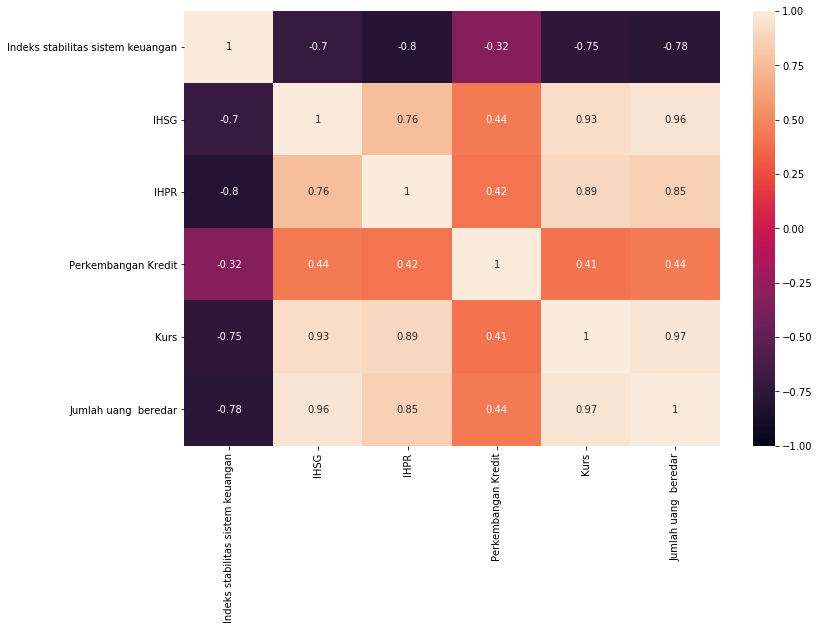

In [21]:
cor=data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,vmin=-1,vmax=1)

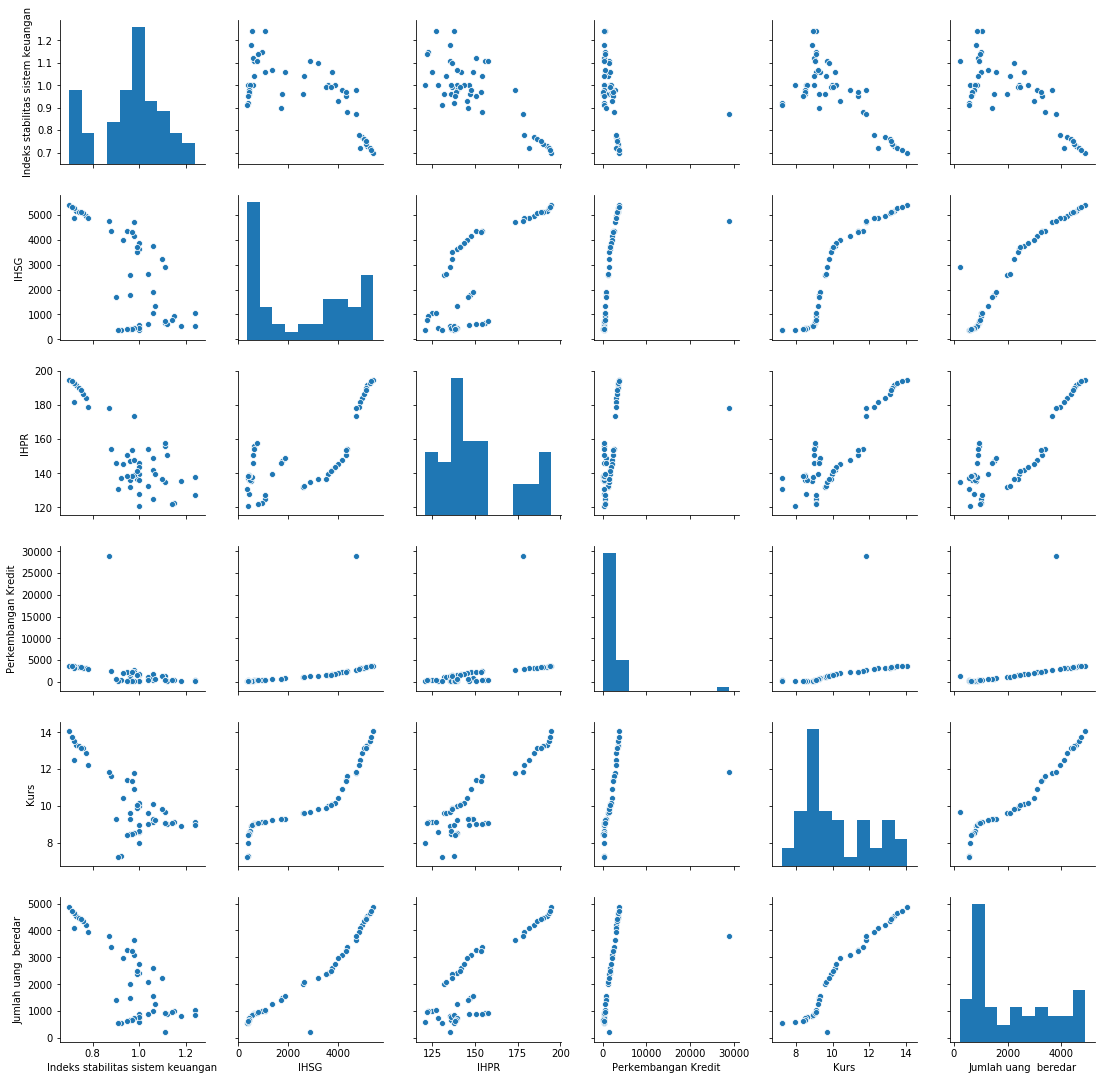

In [58]:
sns.pairplot(data=data)

#### Feature Scalling

In [22]:
from sklearn.preprocessing import StandardScaler

#Memisah variabel dependen dan independen
y=data["Indeks stabilitas sistem keuangan"]
x=data.iloc[:,1:]

#Standarisasi pada variabel independen
scale=StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(data=x,columns=["IHSG","IHPR","Perkembangan Kredit","Kurs","Jumlah uang  beredar"])

In [40]:
y=np.log(y)

#### Partisi Data

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Modeling

In [25]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

#### Regresi Linear

In [42]:
X_train2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train2)
est2 = est.fit()

In [43]:
print(est2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Indeks stabilitas sistem keuangan   R-squared:                       0.795
Model:                                           OLS   Adj. R-squared:                  0.765
Method:                                Least Squares   F-statistic:                     26.38
Date:                               Fri, 14 Aug 2020   Prob (F-statistic):           8.44e-11
Time:                                       15:43:07   Log-Likelihood:                 50.909
No. Observations:                                 40   AIC:                            -89.82
Df Residuals:                                     34   BIC:                            -79.69
Df Model:                                          5                                         
Covariance Type:                           nonrobust                                         
                           coef    std err          t      P

In [44]:
X_train2 = sm.add_constant(X_train.drop(labels=["Jumlah uang  beredar"],axis=1))
est = sm.OLS(y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Indeks stabilitas sistem keuangan   R-squared:                       0.780
Model:                                           OLS   Adj. R-squared:                  0.755
Method:                                Least Squares   F-statistic:                     31.08
Date:                               Fri, 14 Aug 2020   Prob (F-statistic):           4.45e-11
Time:                                       15:44:30   Log-Likelihood:                 49.520
No. Observations:                                 40   AIC:                            -89.04
Df Residuals:                                     35   BIC:                            -80.59
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
                          coef    std err          t      P>

In [45]:
X_train2 = sm.add_constant(X_train.drop(labels=["Jumlah uang  beredar","IHPR"],axis=1))
est = sm.OLS(y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Indeks stabilitas sistem keuangan   R-squared:                       0.759
Model:                                           OLS   Adj. R-squared:                  0.739
Method:                                Least Squares   F-statistic:                     37.84
Date:                               Fri, 14 Aug 2020   Prob (F-statistic):           3.18e-11
Time:                                       15:44:49   Log-Likelihood:                 47.687
No. Observations:                                 40   AIC:                            -87.37
Df Residuals:                                     36   BIC:                            -80.62
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                          coef    std err          t      P>

In [46]:
X_train2 = sm.add_constant(X_train.drop(labels=["Jumlah uang  beredar","IHPR","Kurs"],axis=1))
est = sm.OLS(y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Indeks stabilitas sistem keuangan   R-squared:                       0.738
Model:                                           OLS   Adj. R-squared:                  0.724
Method:                                Least Squares   F-statistic:                     52.19
Date:                               Fri, 14 Aug 2020   Prob (F-statistic):           1.70e-11
Time:                                       15:45:00   Log-Likelihood:                 46.021
No. Observations:                                 40   AIC:                            -86.04
Df Residuals:                                     37   BIC:                            -80.98
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                          coef    std err          t      P>

In [47]:
#Cek autokorelasi
import statsmodels.api as sm
residual=est2.resid
sm.stats.diagnostic.acorr_ljungbox(residual,lags=[20],return_df=True)

,lb_stat,lb_pvalue
20,21.977629,0.341726


In [48]:
#Cek Multikolinearitas
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.drop(labels=["Jumlah uang  beredar",
                                                                    "IHPR","Kurs"],axis=1).values, i) for i in range(X_train.drop(labels=["Jumlah uang  beredar",
                                                                                                                                          "IHPR","Kurs"],axis=1).shape[1])]
vif["features"] = X_train.drop(labels=["Jumlah uang  beredar","IHPR","Kurs"],axis=1).columns
vif

,VIF Factor,features
0,4.883456,IHSG
1,4.883456,Perkembangan Kredit


In [49]:
#Cek Homoskesdastisitas
bp_test=sm.stats.diagnostic.het_breuschpagan(residual,est2.model.exog)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 5.404228570057441, 'LM-Test p-value': 0.06706357123559081, 'F-Statistic': 2.889897360679512, 'F-Test p-value': 0.06820496871438742}


#### Evaluasi Model

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error
pred_lr=est2.predict(sm.add_constant(X_test.drop(labels=["Jumlah uang  beredar","IHPR","Kurs"],axis=1)))
mean_squared_error(y_test,pred_lr)

5.686406590272892

### Regresi Ridge

In [51]:
#Cek Multikolinearitas
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif

,VIF Factor,features
0,15.949809,IHSG
1,6.639688,IHPR
2,6.229725,Perkembangan Kredit
3,20.474934,Kurs
4,23.468013,Jumlah uang beredar


In [52]:
#Melihat Keunggulan Ridge
from sklearn.linear_model import Ridge
coef=[]
alphas = range(0,40)

for a in alphas:
  ridgereg=Ridge(alpha=a)
  ridgereg.fit(X_train,y_train)
  coef.append(ridgereg.coef_)

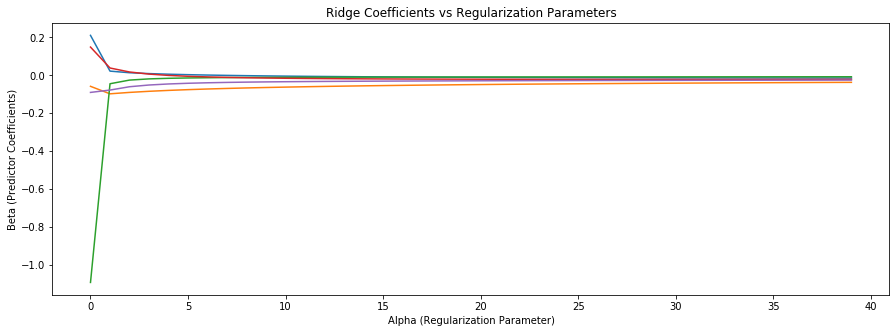

In [53]:
###Membuat plot antara alpha dan koefisien
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')
ax.axis('tight')
###ax.legend(loc='best')
fig.savefig('coef_vs_alpha.png')

In [56]:
#Membangun model regresi ridge dengan nilai alpha terbaik
from sklearn.linear_model import RidgeCV
regr_cv=RidgeCV(alphas=range(1,40))
model_cv=regr_cv.fit(X_train,y_train)

#alpha terbaik
print(model_cv.alpha_)

#Parameter regresi ridge
print(model_cv.intercept_)
print(model_cv.coef_)

1
-0.06197786302757129
[ 0.02232589 -0.09728244 -0.04418331  0.03878781 -0.07751509]


In [57]:
#Cek autokorelasi
import statsmodels.api as sm
residual1=y_train-(model_cv.predict(X_train))
sm.stats.diagnostic.acorr_ljungbox(residual1,lags=[20],return_df=True)

,lb_stat,lb_pvalue
20,38.546217,0.007589


In [58]:
#Cek Homoskesdastisitas
bp_test=sm.stats.diagnostic.het_breuschpagan(residual1,X_train)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 20.001209986254516, 'LM-Test p-value': 0.0004991246356961807, 'F-Statistic': 7.000847041623597, 'F-Test p-value': 0.00012602257311735963}


In [59]:
#Cek Normalitas
import scipy
scipy.stats.jarque_bera(residual1)

(4.1669630607820665, 0.12449602013306271)

#### Evaluasi Model

In [60]:
#R Square
r2=r2_score(y_train,model_cv.predict(X_train))
r2

0.7371380146573441

In [61]:
#Adjusted R square
adjusted_r_squared = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adjusted_r_squared

0.6984818403422477

In [62]:
#MSE
pred_lridge=model_cv.predict(X_test)
mean_squared_error(y_test,pred_lridge)

0.02009864828206541

### Regresi Polinomial

In [63]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(x.drop(labels=["Jumlah uang  beredar","IHPR","Kurs"],axis=1))

poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, y, test_size = 0.2, random_state = 42)

In [64]:
X_train2 = sm.add_constant(poly_var_train)
est = sm.OLS(y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Indeks stabilitas sistem keuangan   R-squared:                       0.755
Model:                                           OLS   Adj. R-squared:                  0.719
Method:                                Least Squares   F-statistic:                     20.99
Date:                               Fri, 14 Aug 2020   Prob (F-statistic):           1.60e-09
Time:                                       16:18:17   Log-Likelihood:                 47.364
No. Observations:                                 40   AIC:                            -82.73
Df Residuals:                                     34   BIC:                            -72.60
Df Model:                                          5                                         
Covariance Type:                           nonrobust                                         
                 coef    std err          t      P>|t|      